### 2.1. Problem Statement: Machine Learning 7 

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014  season.

A look at the data Before we dive into the algorithm, let’s take a look at our data. 

Each row in  the data contains information on how a player performed in the 2013-2014  NBA season.

Download 'nba_2013.csv' file from this link: 
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 Here are some selected columns from 

the data: 
player - name of the player 
pos - the position of the player 
g - number of games the player was in 
gs - number of games the player started 
pts - total points the player scored 
There are many more columns in the data, mostly containing information  about average player game performance over the course of the season.  See this site for an explanation of the rest of them. 
We can read our dataset in and figure out which columns are present:
import pandas 
with open("nba_2013.csv", 'r') as csvfile: 
nba = pandas.read_csv(csvfile) 

In [1]:
import pandas as pd 
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


### Check for null values 

In [2]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

### fillna with series mean

In [3]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

### Select only the numeric columns from the dataset

In [4]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

### Normalize all of the numeric columns

In [5]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

### Categorical Columns

In [6]:
nba_category = nba[['player', 'bref_team_id', 'season']]

In [7]:
nba = pd.concat([nba_category, nba_normalized], axis=1)

from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

### Create the knn model. We will use regressor because we are predicting on continous values

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


### K=8, as it gives us the highest prediction score.

In [9]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [11]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


### 2.2. Problem Statement:  Machine Learning 8 
In this assignment, students have to find the frequency of words in a  webpage. User can use urllib and BeautifulSoup to extract text from  webpage. 

Hint: 

from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 

In [5]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Fetching url and the html

In [7]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
#soup = BeautifulSoup(html,"html5lib")
soup = BeautifulSoup(html)

In [9]:
print(soup.title)
print(soup.title.string)

<title>PHP: Hypertext Preprocessor</title>
PHP: Hypertext Preprocessor


# Extracting text
finding tokens

In [10]:
#text= soup.find('body').get_text(strip=True)     for body text
text = soup.get_text()
#tokens = [t for t in text.split()]   # words list 

# or by re

tokens = re.findall('\w+', text)

In [11]:
tokens[:15]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language']

### converting tokens to lower case

In [12]:
words = []
for word in tokens:
    words.append(word.lower())
words[:5]
  

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

## Removing Stopwords

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [15]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
    if w not in stopWords:
        clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]
    

Total including stopwords: 3114
Length after stopwords: 2086
Total removed stopwords: 1028


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']

# words Frequency distribution

  - Total count
  - unique(vocab)
  - lexical diversity
  - most common
  - max count word
  - A list of all hapax legomena (words that only appear one time in the corpus).
  - counts.freq(): The percentage of the corpus for the given token.
  - counts.plot(): Plot the frequencies of the n most commonly occuring words.

In [16]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Text has 344 types and 2086 tokens for a lexical diversity of 6.064


In [17]:
print(counts.most_common(10))

[('php', 174), ('release', 77), ('7', 74), ('0', 54), ('downloads', 43), ('found', 43), ('version', 43), ('source', 42), ('windows', 41), ('please', 41)]


In [18]:
print(counts.max())

php


In [19]:
print(counts.hapaxes()[0:10])

['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax']


In [20]:
counts.freq('php'), counts.freq('hypertext'),

(0.08341323106423777, 0.00047938638542665386)

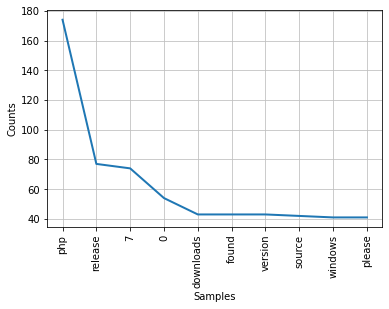

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
counts.plot(10, cumulative=False)


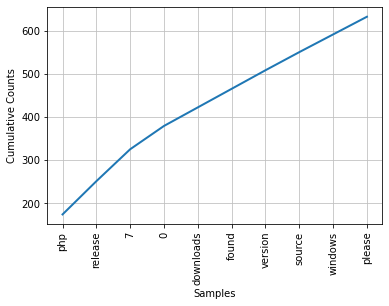

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
counts.plot(10, cumulative=True)

In [23]:
#ref: https://www.analyticsindiamag.com/using-natural-language-processing-to-check-word-frequency-in-the-adventure-of-sherlock-holmes/

### 2.3. Problem Statement: Machine Learning 9 
In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look  for quality difference.

The raw image is available in spicy.misc package with the name face. 

Hint: 

import numpy as np
from sklearn import cluster, datasets 
from scipy import misc 

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
face = misc.face(gray=True)

In [14]:
print("Original Image Shape: ",face.shape)
X = face.reshape((-1,1))
print("Resized Image Shape: ",X.shape)

Original Image Shape:  (768, 1024)
Resized Image Shape:  (786432, 1)


In [15]:
k_means = KMeans(n_clusters=5, n_init=4, random_state=0)
k_means.fit(X)

KMeans(n_clusters=5, n_init=4, random_state=0)

## Create The Values and Labels

In [16]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

## Create an Array for Labels and Values

In [17]:
face_compressed = np.choose(labels, values)

face_compressed.shape = face.shape

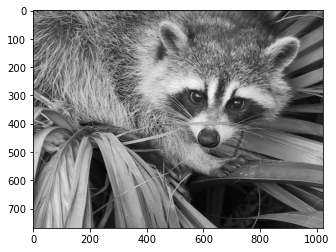

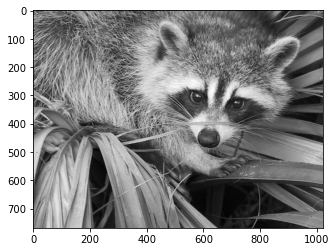

In [18]:
# Let's see the Original Image.
plt.figure(1)
plt.imshow(face, cmap=plt.cm.gray, vmin=face.min(), vmax=256)

## Compressed face
plt.figure(2)
plt.imshow(face, cmap=plt.cm.gray, vmin=face.min(), vmax=face.max())

### 2.4. Problem Statement: Machine Learning 10 
In this assignment students have to transform iris data into 3 dimensions  and plot a 3d chart with transformed dimensions and colour each data point with specific class.

Hint: 

In [19]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA  
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

In [21]:
X_reduced = PCA(n_components=3).fit_transform(iris.data)
Y = iris.target

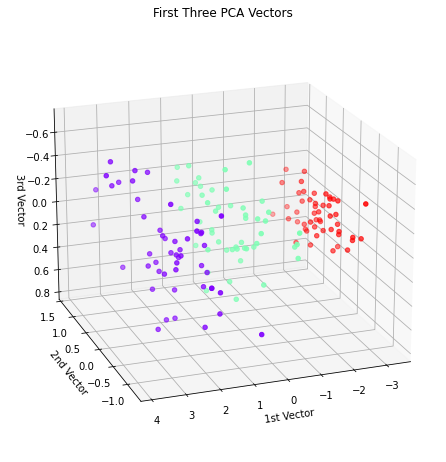

In [29]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-160, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
          cmap=plt.cm.rainbow_r)

ax.set_title("First Three PCA Vectors")
ax.set_xlabel("1st Vector")
ax.set_ylabel("2nd Vector")
ax.set_zlabel("3rd Vector")

plt.show()

### 2.5. Problem Statement: Machine Learning 11 
In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link: 
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three 

year-period#!ds =22r0&display=line 

Hint:
Following is the command import packages and data 

from pandas import read_csv  
from pandas import datetime 
from matplotlib import pyplot 
from statsmodels.tsa.arima_model  
import ARIMA from sklearn.metrics  
import mean_squared_error def  
parser(x): 
return datetime.strptime('190'+x, '%Y-%m') 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0],  index_col=0, squeeze=True, date_parser=parser)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
shampoo = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv")
shampoo.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [113]:
type(shampoo)

pandas.core.frame.DataFrame

As we can see the type of this file is Data Frame but we need it as a time-series.

#### How to you convert data into a Time-Series?

In [114]:
shampoo = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", index_col=[0], parse_dates=True,
                     squeeze=True)

In [115]:
type(shampoo)

pandas.core.series.Series

In [116]:
shampoo.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64

<AxesSubplot:xlabel='Month'>

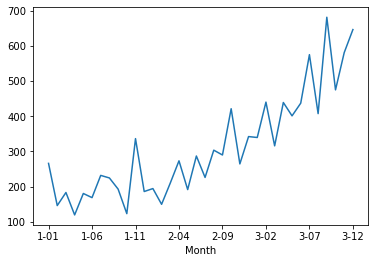

In [117]:
shampoo.plot()

### 

In [118]:
shampoo.size

37

In [119]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [132]:
shampoo = shampoo.dropna()
shampoo.isnull().sum()

0

In [134]:
X = shampoo.values
size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]


In [136]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117636, expected=342.300000
predicted=306.513009, expected=339.700000
predicted=387.376444, expected=440.400000
predicted=348.154210, expected=315.900000
predicted=386.308831, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379510, expected=437.400000
predicted=394.737284, expected=575.500000
predicted=434.915498, expected=407.600000
predicted=507.923383, expected=682.000000
predicted=435.482720, expected=475.300000
predicted=652.743779, expected=581.300000
predicted=546.343458, expected=646.900000
Test MSE: 6958.328


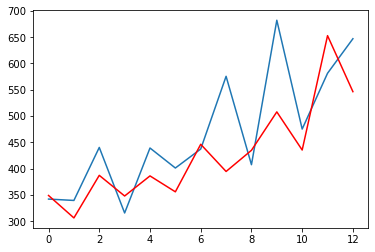

In [137]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()